Short inspection in train and validation datasets

In [1]:
import pandas as pd

# File paths
train_path = '../../data/splitted_datasets/allele/beta/train.tsv'
valid_path = '../../data/splitted_datasets/allele/beta/validation.tsv'

# Load the TSV files
train_df = pd.read_csv(train_path, sep='\t')
valid_df = pd.read_csv(valid_path, sep='\t')

# # Print the head (first few rows) and length (number of rows) of both datasets
# print("Train dataset head:")
# print(train_df.head())  # First few rows of the training set
print(f"Train dataset length: {len(train_df)}")

# print("\nValidation dataset head:")
# print(valid_df.head())  # First few rows of the validation set
print(f"Validation dataset length: {len(valid_df)}")


/tmp/ipykernel_218269/381989945.py:8: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path, sep='\t')


Train dataset length: 280252
Validation dataset length: 210192


In [2]:
import pandas as pd

# File paths
t_path = '../../data/splitted_datasets/allele/beta/train.tsv'
v_path = '../../data/splitted_datasets/allele/beta/validation.tsv'

# Function to count binding and non-binding rows
def count_binding_rows(file_path):
    # Read the TSV file
    df = pd.read_csv(file_path, sep='\t')
    
    # Count the number of binding (1) and non-binding (0) rows
    binding_count = df[df['Binding'] == 1].shape[0]
    non_binding_count = df[df['Binding'] == 0].shape[0]
    
    return binding_count, non_binding_count

# Count for training dataset
train_binding, train_non_binding = count_binding_rows(t_path)
print(f"Training Dataset - Binding: {train_binding}, Non-Binding: {train_non_binding}")

# Count for validation dataset
val_binding, val_non_binding = count_binding_rows(v_path)
print(f"Validation Dataset - Binding: {val_binding}, Non-Binding: {val_non_binding}")

/tmp/ipykernel_218269/3552120905.py:10: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, sep='\t')


Training Dataset - Binding: 140126, Non-Binding: 140126
Validation Dataset - Binding: 35032, Non-Binding: 175160


/tmp/ipykernel_218269/1833262170.py:9: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path, sep='\t')


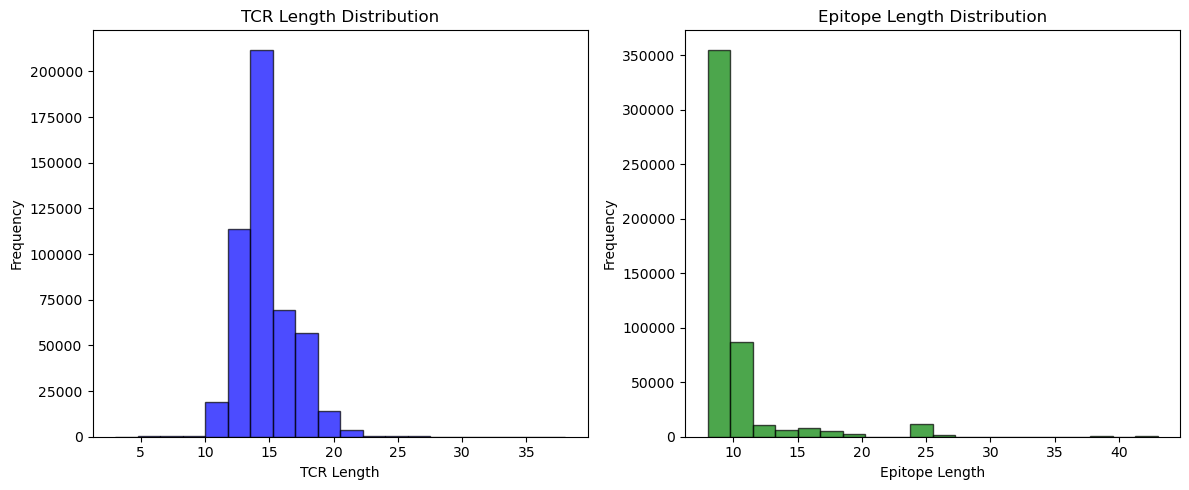

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths
train_path = '../../data/splitted_datasets/allele/beta/train.tsv'
valid_path = '../../data/splitted_datasets/allele/beta/validation.tsv'

# Load data
train_df = pd.read_csv(train_path, sep='\t')
valid_df = pd.read_csv(valid_path, sep='\t')

# Combine datasets
data = pd.concat([train_df, valid_df], ignore_index=True)

# Ensure the columns exist
if 'TRB_CDR3' not in data.columns or 'Epitope' not in data.columns:
    raise ValueError("Columns 'TRB_CDR3' and 'Epitope' must exist in the dataset")

# Compute lengths
data['tcr_length'] = data['TRB_CDR3'].astype(str).apply(len)
data['epitope_length'] = data['Epitope'].astype(str).apply(len)

# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(data['tcr_length'], bins=20, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('TCR Length')
plt.ylabel('Frequency')
plt.title('TCR Length Distribution')

plt.subplot(1, 2, 2)
plt.hist(data['epitope_length'], bins=20, color='green', alpha=0.7, edgecolor='black')
plt.xlabel('Epitope Length')
plt.ylabel('Frequency')
plt.title('Epitope Length Distribution')

plt.tight_layout()
plt.show()


In [4]:
# Filter epitopes longer than 26
long_epitopes = data[data['epitope_length'] > 26]

# Count the number of long epitopes
num_long_epitopes = long_epitopes.shape[0]

# Display the long epitopes
print(f"Number of epitopes longer than 26: {num_long_epitopes}")
print("Epitopes longer than 26:")
print(long_epitopes[['Epitope', 'epitope_length']])

Number of epitopes longer than 26: 3112
Epitopes longer than 26:
                                            Epitope  epitope_length
100                     GLEAPFLYLYALVYFLQSINFVRIIMR              27
114                     GLEAPFLYLYALVYFLQSINFVRIIMR              27
119                     GLEAPFLYLYALVYFLQSINFVRIIMR              27
164                     GLEAPFLYLYALVYFLQSINFVRIIMR              27
306                     GLEAPFLYLYALVYFLQSINFVRIIMR              27
...                                             ...             ...
315193  LPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERD              43
315197  ILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASA              43
315255  MIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGV              43
315271  ILSRLDKVEAEVQIDRLITGRLQSLQTYVTQQLIRAAEIRASA              43
315279       WESGVKDCVVLHSYFTSDYYQLYSTQLSTDTGVEHVTF              38

[3112 rows x 2 columns]


Investigations on ProtBERT-Embeddings in oder to get shape, type, etc., and be able to use them in the transformer

Paired

In [5]:
import numpy as np

# Path to the embeddings file
paired_all_epi_path = '../../data/embeddings/paired/allele/Epitope_paired_embeddings.npz'
paired_all_tra_path = '../../data/embeddings/paired/allele/TRA_paired_embeddings.npz'
paired_all_trb_path = '../../data/embeddings/paired/allele/TRB_paired_embeddings.npz'

beta_all_epi_path = '../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz'
beta_all_trb_path = '../../data/embeddings/beta/allele/TRB_beta_embeddings.npz'
paths = [paired_all_epi_path, paired_all_tra_path,paired_all_trb_path ]

paths_beta = [beta_all_epi_path, beta_all_trb_path]
for path in paths_beta:
    # Load the NPZ file
    data = np.load(path)

    # Print available keys in the file
    print("Number of keys in the NPZ file:", len(data.files))

    # Inspect the shape and size of each stored array
    for key in data.files[:10]:
        array = data[key]
        print(f"\nKey: {key}")
        print(f"Shape: {array.shape}")
        print(f"Size: {array.size}")
        print(f"Data Type: {array.dtype}")
        print(f"Sample Data (first 5 elements):\n{array[:5] if array.ndim == 1 else array[:5, :5]}")


Number of keys in the NPZ file: 1896

Key: NLTTRTQL
Shape: (8, 1024)
Size: 8192
Data Type: float32
Sample Data (first 5 elements):
[[ 0.13486663  0.16832928  0.01105008 -0.2017876   0.21350099]
 [ 0.06380487  0.13675283  0.00786234 -0.12408309  0.31762993]
 [ 0.01229951  0.05960181  0.00698517 -0.0671403   0.08832411]
 [ 0.03610628  0.0980993   0.03087564 -0.11637626  0.03888167]
 [ 0.04467435  0.12075185  0.01568509 -0.10579667  0.06191917]]

Key: FIYIFHTL
Shape: (8, 1024)
Size: 8192
Data Type: float32
Sample Data (first 5 elements):
[[ 0.10352622  0.19366597  0.01785575 -0.14839908  0.25590894]
 [-0.05904485  0.1726287   0.08648816  0.00153423  0.19045785]
 [-0.03943206  0.14551184  0.07295718  0.01637407  0.07709593]
 [-0.04497753  0.11167102 -0.02338432  0.08326313  0.1050052 ]
 [-0.02016015  0.17720129  0.05871242  0.01146071  0.08313055]]

Key: YMHHMELPT
Shape: (9, 1024)
Size: 9216
Data Type: float32
Sample Data (first 5 elements):
[[ 0.06514921  0.11687686  0.04630813 -0.1331488

In [4]:
import numpy as np

# Path to the embeddings file
paired_all_epi_path = '../../data/embeddings/paired/allele/Epitope_paired_embeddings.npz'
paired_all_tra_path = '../../data/embeddings/paired/allele/TRA_paired_embeddings.npz'
paired_all_trb_path = '../../data/embeddings/paired/allele/TRB_paired_embeddings.npz'
paths = [paired_all_epi_path, paired_all_tra_path,paired_all_trb_path ]
for path in paths:
    # Load the NPZ file
    data = np.load(path)

    # Print available keys in the file
    print("Number of keys in the NPZ file:", len(data.files))

    # Inspect the shape and size of each stored array
    # for key in data.files[:10]:
    #     array = data[key]
    #     print(f"\nKey: {key}")
    #     print(f"Shape: {array.shape}")
    #     print(f"Size: {array.size}")
    #     print(f"Data Type: {array.dtype}")
    #     print(f"Sample Data (first 5 elements):\n{array[:5] if array.ndim == 1 else array[:5, :5]}")


Number of keys in the NPZ file: 1383
Number of keys in the NPZ file: 41519
Number of keys in the NPZ file: 45261


In [ ]:
# raising error, because length tra != length trb.  To be solved.

import numpy as np
import torch
from torch.nn.utils.rnn import pad_sequence

# Paths to the embeddings files
paired_all_epi_path = '../../data/embeddings/paired/allele/Epitope_paired_embeddings.npz'
paired_all_tra_path = '../../data/embeddings/paired/allele/TRA_paired_embeddings.npz'
paired_all_trb_path = '../../data/embeddings/paired/allele/TRB_paired_embeddings.npz'

# Load NPZ files
epi_data = np.load(paired_all_epi_path, allow_pickle=True)
tra_data = np.load(paired_all_tra_path, allow_pickle=True)
trb_data = np.load(paired_all_trb_path, allow_pickle=True)

# Extract embeddings
epi_embeddings = [torch.tensor(epi_data[key]) for key in epi_data]
tra_embeddings = [torch.tensor(tra_data[key]) for key in tra_data]
trb_embeddings = [torch.tensor(trb_data[key]) for key in trb_data]

# Find max sequence length
max_len = max(max(e.shape[0] for e in epi_embeddings), 
              max(e.shape[0] for e in tra_embeddings), 
              max(e.shape[0] for e in trb_embeddings))

# Pad sequences
def pad_embeddings(embeddings, max_len):
    return pad_sequence([torch.nn.functional.pad(e, (0, 0, 0, max_len - e.shape[0])) for e in embeddings], batch_first=True, padding_value=0.0)

padded_epi = pad_embeddings(epi_embeddings, max_len)
padded_tra = pad_embeddings(tra_embeddings, max_len)
padded_trb = pad_embeddings(trb_embeddings, max_len)

# Concatenate along sequence dimension
padded_combined = torch.cat([padded_tra, padded_trb, padded_epi], dim=1)

# Save padded embeddings
padd_paired_all_epi_path = '../../data/embeddings/paired/allele/padded_Epitope_paired_embeddings.npz'
padd_paired_all_tra_path = '../../data/embeddings/paired/allele/padded_TRA_paired_embeddings.npz'
padd_paired_all_trb_path = '../../data/embeddings/paired/allele/padded_TRB_paired_embeddings.npz'
padd_paired_combined_path = '../../data/embeddings/paired/allele/padded_Combined_paired_embeddings.npz'

np.savez(padd_paired_all_epi_path, **{key: padded_epi[i].numpy() for i, key in enumerate(epi_data)})
np.savez(padd_paired_all_tra_path, **{key: padded_tra[i].numpy() for i, key in enumerate(tra_data)})
np.savez(padd_paired_all_trb_path, **{key: padded_trb[i].numpy() for i, key in enumerate(trb_data)})
np.savez(padd_paired_combined_path, combined=padded_combined.numpy())

print("Padded and concatenated embeddings saved successfully.")


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 41519 but got size 45261 for tensor number 1 in the list.

## PCA Dimension reduction

In [2]:
import torch
torch.cuda.empty_cache()
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [3]:
beta_all_epi_path = '../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz'
beta_all_trb_path = '../../data/embeddings/beta/allele/TRB_beta_embeddings.npz'

### Beta

In [4]:
import numpy as np
import torch
from data_scripts.pca_analysis import perform_pca_on_embeddings

def process_chunk(chunk, chunk_index, output_path, device='cuda', n_components=512):
    """
    Führt PCA auf einem Chunk durch und speichert das reduzierte Ergebnis.
    """
    # Auf CUDA verschieben
    chunk_tensor = torch.tensor(chunk, dtype=torch.float32).to(device)

    # Zurück auf CPU und in NumPy konvertieren für PCA
    chunk_cpu = chunk_tensor.cpu().numpy()

    # PCA durchführen
    pca_df = perform_pca_on_embeddings([chunk_cpu], n_components=n_components)

    # Speichern des reduzierten Chunks
    chunk_output_path = f"{output_path}_chunk_{chunk_index}.npz"
    np.savez_compressed(chunk_output_path, embeddings=pca_df.values)
    print(f"✅ Reduzierter Chunk {chunk_index} gespeichert unter: {chunk_output_path}")

def load_and_process_embeddings_in_chunks(file_path, output_path, chunk_size=100_000, device='cuda'):
    """
    Lädt Embeddings in Blöcken, führt PCA durch und speichert sie sofort.
    """
    data = np.load(file_path, allow_pickle=True)
    print(f"🔍 Verfügbare Keys: {len(data.files)}")

    current_chunk = []
    chunk_index = 0

    for idx, key in enumerate(data.files):
        current_chunk.append(data[key])

        # Wenn Chunk voll, dann verarbeiten und speichern
        if len(current_chunk) * 8 >= chunk_size:  # Weil jeder Key 8 Samples hat
            combined_chunk = np.concatenate(current_chunk, axis=0)
            process_chunk(combined_chunk, chunk_index, output_path, device)
            current_chunk = []  # Speicher freigeben
            chunk_index += 1

    # Verarbeite den letzten, unvollständigen Chunk
    if current_chunk:
        combined_chunk = np.concatenate(current_chunk, axis=0)
        process_chunk(combined_chunk, chunk_index, output_path, device)
        print(f"✅ Letzter Chunk verarbeitet mit Shape: {combined_chunk.shape}")


In [ ]:
# === Lade, verarbeite und speichere TCR-Embeddings ===
load_and_process_embeddings_in_chunks(
    file_path='../../data/embeddings/beta/allele/TRB_beta_embeddings.npz',
    output_path='../../data/embeddings/beta/allele/TRB_beta_embeddings_reduced',
    chunk_size=100_000,
    device='cuda'
)

# === Lade, verarbeite und speichere Epitope-Embeddings ===
load_and_process_embeddings_in_chunks(
    file_path='../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz',
    output_path='../../data/embeddings/beta/allele/Epitope_beta_embeddings_reduced',
    chunk_size=100_000,
    device='cuda'
)

🔍 Verfügbare Keys: 211529
Lade und puffer alle Batches...
Batch 0 geladen mit Shape: (183794, 1024)
Gesamte Datenform vor PCA: (183794, 1024)
Gesamte Datenform nach PCA: (183794, 512)
Erklärte Varianz pro Komponente: [1.32249368e-01 9.58742275e-02 7.89532647e-02 5.11123302e-02
 4.80737901e-02 4.30722391e-02 4.12162620e-02 3.67663143e-02
 3.44270099e-02 3.00138312e-02 2.75371255e-02 2.53238905e-02
 2.09061986e-02 1.88502574e-02 1.82200435e-02 1.76574678e-02
 1.67295576e-02 1.39572318e-02 1.24031297e-02 1.13262613e-02
 1.04606786e-02 9.60687032e-03 8.80338193e-03 8.47489202e-03
 8.19804270e-03 7.24789258e-03 6.62234060e-03 6.46977093e-03
 6.05263837e-03 5.62309360e-03 5.19391063e-03 4.63077482e-03
 4.57076437e-03 4.37590878e-03 4.22315599e-03 3.85675877e-03
 3.70877228e-03 3.50729256e-03 3.36813172e-03 3.19846308e-03
 3.02063081e-03 2.81538770e-03 2.59925467e-03 2.51338564e-03
 2.38639413e-03 2.29968182e-03 2.23009345e-03 2.17231169e-03
 2.08578046e-03 1.99314245e-03 1.89377655e-03 1.780

In [ ]:
import numpy as np

def combine_reduced_chunks(output_file_path, chunk_base_path, total_chunks):
    """
    Kombiniert alle reduzierten Chunks in eine finale Datei.
    """
    combined_chunks = []

    for i in range(total_chunks):
        chunk_path = f"{chunk_base_path}_chunk_{i}.npz"
        chunk = np.load(chunk_path)['embeddings']
        combined_chunks.append(chunk)
        print(f"🔄 Chunk {i} geladen von {chunk_path} mit Shape: {chunk.shape}")

    # Zusammenfügen aller Chunks
    final_combined = np.vstack(combined_chunks)
    np.savez_compressed(output_file_path, embeddings=final_combined)
    print(f"✅ Finale reduzierte Embeddings gespeichert unter: {output_file_path}")


# === TRB Chunks zusammenführen ===
combine_reduced_chunks(
    output_file_path='../../data/embeddings/beta/allele/TRB_beta_embeddings_reduced_final.npz',
    chunk_base_path='../../data/embeddings/beta/allele/TRB_beta_embeddings_reduced',
    total_chunks=2  # <- Anzahl der TRB Chunks
)

# === Epitope Chunks zusammenführen ===
combine_reduced_chunks(
    output_file_path='../../data/embeddings/beta/allele/Epitope_beta_embeddings_reduced_final.npz',
    chunk_base_path='../../data/embeddings/beta/allele/Epitope_beta_embeddings_reduced',
    total_chunks=2  # <- Anzahl der Epitope Chunks
)

In [ ]:
def check_final_embeddings(file_path):
    data = np.load(file_path, allow_pickle=True)['embeddings']
    print(f"✅ Finale Shape: {data.shape}")
    print(f"🔍 Erste 5 Embeddings:\n{data[:5]}")

# Überprüfe TRB
check_final_embeddings('../../data/embeddings/beta/allele/TRB_beta_embeddings_reduced_final.npz')

# Überprüfe Epitope
check_final_embeddings('../../data/embeddings/beta/allele/Epitope_beta_embeddings_reduced_final.npz')

## beta and paired

In [6]:
import torch
torch.cuda.empty_cache()


### Padding embeddings using GPU

In [3]:
import numpy as np
import torch
from torch.nn.utils.rnn import pad_sequence

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Paths to embeddings files
# paired_all_epi_path = '../../data/embeddings/paired/allele/Epitope_paired_embeddings.npz'
# paired_all_tra_path = '../../data/embeddings/paired/allele/TRA_paired_embeddings.npz'
# paired_all_trb_path = '../../data/embeddings/paired/allele/TRB_paired_embeddings.npz'

beta_all_epi_path = '../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz'
beta_all_trb_path = '../../data/embeddings/beta/allele/TRB_beta_embeddings.npz'

# Load NPZ files into GPU
def load_embeddings_to_gpu(path):
    data = np.load(path, allow_pickle=True)
    return {key: torch.tensor(data[key], device=device) for key in data}

# epi_embeddings = load_embeddings_to_gpu(paired_all_epi_path)
# tra_embeddings = load_embeddings_to_gpu(paired_all_tra_path)
# trb_embeddings = load_embeddings_to_gpu(paired_all_trb_path)

beta_epi_embeddings = load_embeddings_to_gpu(beta_all_epi_path)
beta_trb_embeddings = load_embeddings_to_gpu(beta_all_trb_path)

# Find max sequence length
# max_len = max(max(e.shape[0] for e in epi_embeddings.values()), 
#               max(e.shape[0] for e in tra_embeddings.values()), 
#               max(e.shape[0] for e in trb_embeddings.values()))

beta_max_len = max(max(e.shape[0] for e in beta_epi_embeddings.values()), 
                    max(e.shape[0] for e in beta_trb_embeddings.values()))

# Function to pad embeddings on GPU
def pad_embeddings(embeddings, max_len):
    return pad_sequence(
        [torch.nn.functional.pad(e, (0, 0, 0, max_len - e.shape[0])) for e in embeddings.values()],
        batch_first=True, padding_value=0.0
    )

# Pad embeddings (all computations on GPU)
# padded_epi = pad_embeddings(epi_embeddings, max_len)
# padded_tra = pad_embeddings(tra_embeddings, max_len)
# padded_trb = pad_embeddings(trb_embeddings, max_len)

padded_beta_epi = pad_embeddings(beta_epi_embeddings, beta_max_len)
# padded_beta_trb = pad_embeddings(beta_trb_embeddings, beta_max_len)

# Move back to CPU before saving
# padded_epi = padded_epi.cpu().numpy()
# padded_tra = padded_tra.cpu().numpy()
# padded_trb = padded_trb.cpu().numpy()

padded_beta_epi = padded_beta_epi.cpu().numpy()
# padded_beta_trb = padded_beta_trb.cpu().numpy()

# Save padded embeddings
# padd_paired_all_epi_path = '../../data/embeddings/paired/allele/padded_Epitope_paired_embeddings.npz'
# padd_paired_all_tra_path = '../../data/embeddings/paired/allele/padded_TRA_paired_embeddings.npz'
# padd_paired_all_trb_path = '../../data/embeddings/paired/allele/padded_TRB_paired_embeddings.npz'

padd_beta_all_epi_path = '../../data/embeddings/beta/allele/padded_Epitope_beta_embeddings.npz'
# padd_beta_all_trb_path = '../../data/embeddings/beta/allele/padded_TRB_beta_embeddings.npz'

# np.savez(padd_paired_all_epi_path, **{key: padded_epi[i] for i, key in enumerate(epi_embeddings)})
# np.savez(padd_paired_all_tra_path, **{key: padded_tra[i] for i, key in enumerate(tra_embeddings)})
# np.savez(padd_paired_all_trb_path, **{key: padded_trb[i] for i, key in enumerate(trb_embeddings)})

np.savez(padd_beta_all_epi_path, **{key: padded_beta_epi[i] for i, key in enumerate(beta_epi_embeddings)})
# np.savez(padd_beta_all_trb_path, **{key: padded_beta_trb[i] for i, key in enumerate(beta_trb_embeddings)})

print("Padded embedding saved successfully.")


Using device: cuda


OutOfMemoryError: CUDA out of memory. Tried to allocate 2.00 MiB. GPU 0 has a total capacity of 14.56 GiB of which 2.75 MiB is free. Including non-PyTorch memory, this process has 14.56 GiB memory in use. Of the allocated memory 14.38 GiB is allocated by PyTorch, and 64.34 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

#### short inspection into padded embeddings in directory prov.
#### Just to check the Size

In [10]:
paddedepiembpath = '../../data/embeddings/beta/gene/prov/padded_epitope_embeddings_batch_0.npz'
paddedtcrembpath = '../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_0.npz'
paths = [paddedepiembpath, paddedtcrembpath]
for path in paths:
    # Load the NPZ file
    data = np.load(path)

    # Print available keys in the file
    print("Number of keys in the NPZ file:", len(data.files))

    # Inspect the shape and size of each stored array
    for key in data.files[:10]:
        array = data[key]
        print(f"\nKey: {key}")
        print(f"Shape: {array.shape}")
        print(f"Size: {array.size}")
        print(f"Data Type: {array.dtype}")
        # print(f"Sample Data (first 5 elements):\n{array[:5] if array.ndim == 1 else array[:5, :5]}")

Number of keys in the NPZ file: 1896

Key: NLTTRTQL
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: FIYIFHTL
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: YMHHMELPT
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: ILLDWAANI
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: SMWALVISV
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: LYALVYFLQ
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: WLPTGTLLV
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: YVDDVVLGA
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: GTSGSPIVAR
Shape: (43, 1024)
Size: 44032
Data Type: float32

Key: LTGHMLDMY
Shape: (43, 1024)
Size: 44032
Data Type: float32
Number of keys in the NPZ file: 10000

Key: CASSSTASRNTGELFF
Shape: (38, 1024)
Size: 38912
Data Type: float32

Key: CASSLVTGEQYF
Shape: (38, 1024)
Size: 38912
Data Type: float32

Key: CASSAHRGGYGYTF
Shape: (38, 1024)
Size: 38912
Data Type: float32

Key: CASSLGRTGGNIQYF
Shape: (38, 1024)
Size: 38912
Data Type: flo

### remove all files in folder 'prov'

In [ ]:
# import os
# import shutil

# # Define the directory path
# directory_path = '../../data/embeddings/beta/gene/prov'

# # Check if the directory exists
# if os.path.exists(directory_path):
#     # Iterate over all files in the directory and remove them
#     for filename in os.listdir(directory_path):
#         file_path = os.path.join(directory_path, filename)
#         try:
#             if os.path.isfile(file_path) or os.path.islink(file_path):
#                 os.unlink(file_path)  # Remove the file or symbolic link
#             elif os.path.isdir(file_path):
#                 shutil.rmtree(file_path)  # Remove the subdirectory
#         except Exception as e:
#             print(f"Failed to delete {file_path}. Reason: {e}")
#     print(f"All files in {directory_path} have been removed.")
# else:
#     print(f"The directory {directory_path} does not exist.")

All files in ../../data/embeddings/beta/gene/prov have been removed.


#### Padding all embeddings and saving in batches

to same length (max(max(len(epitope)), max(len(tcr))))

In [3]:
import pandas as pd
import numpy as np

# Load the training and validation data
train_path = '../../data/splitted_datasets/allele/beta/train.tsv'
validation_path = '../../data/splitted_datasets/allele/beta/validation.tsv'

train_data = pd.read_csv(train_path, sep='\t')
validation_data = pd.read_csv(validation_path, sep='\t')

# Load the embeddings
tcr_embeddings_path = '../../data/embeddings/beta/allele/TRB_beta_embeddings.npz'
epitope_embeddings_path = '../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz'

tcr_embeddings = np.load(tcr_embeddings_path, allow_pickle=True)
epitope_embeddings = np.load(epitope_embeddings_path, allow_pickle=True)

/tmp/ipykernel_185630/2300908741.py:8: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path, sep='\t')


In [ ]:
import numpy as np
import os

def pad_embeddings_in_batches(embeddings_dict, max_length, batch_size, save_path):
    """
    Pad embeddings in batches and save them incrementally to disk.
    """
    keys = list(embeddings_dict.keys())
    num_batches = (len(keys) + batch_size - 1) // batch_size  # Calculate number of batches

    # Create a directory to save the batches
    os.makedirs(os.path.dirname(save_path), exist_ok=True)

    for i in range(num_batches):
        batch_keys = keys[i * batch_size : (i + 1) * batch_size]
        padded_batch = {}

        for key in batch_keys:
            embedding = embeddings_dict[key]
            padded_embedding = np.zeros((max_length, embedding.shape[1]), dtype=embedding.dtype)
            padded_embedding[:embedding.shape[0], :] = embedding
            padded_batch[key] = padded_embedding

        # Save the batch to disk
        batch_save_path = f"{save_path}_batch_{i}.npz"
        np.savez_compressed(batch_save_path, **padded_batch)
        print(f"Saved batch {i + 1}/{num_batches} to {batch_save_path}")

    print("All batches saved successfully!")

# Define batch size (adjust based on memory availability)
batch_size = 10000  # Process 10000 embeddings at a time

# Determine the maximum length for TCR and Epitope embeddings
max_tcr_length = max([embedding.shape[0] for embedding in tcr_embeddings.values()])
max_epitope_length = max([embedding.shape[0] for embedding in epitope_embeddings.values()])

# Calculate the global max_length
max_length = max(max_tcr_length, max_epitope_length)

# Pad and save TCR embeddings in batches using the global max_length
pad_embeddings_in_batches(tcr_embeddings, max_length, batch_size, '../../data/embeddings/beta/allele/padded/padded_tcr_embeddings')

# Pad and save Epitope embeddings in batches using the global max_length
pad_embeddings_in_batches(epitope_embeddings, max_length, batch_size, '../../data/embeddings/beta/allele/padded/padded_epitope_embeddings')

Saved batch 1/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_0.npz
Saved batch 2/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_1.npz
Saved batch 3/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_2.npz
Saved batch 4/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_3.npz
Saved batch 5/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_4.npz
Saved batch 6/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_5.npz
Saved batch 7/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_6.npz
Saved batch 8/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_7.npz
Saved batch 9/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_8.npz
Saved batch 10/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_9.npz
Saved batch 11/22 to ../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_10.

##### Checking dimensions of subset padded emb

In [ ]:
# let's check if the dimensions in the version2 were padded correctly for both epitopes and tcrs
padd_beta_all_epi_path = './dummy_data/subset_padded_epitope_embeddings.npz'
padd_beta_all_trb_path = './dummy_data/subset_padded_tcr_embeddings.npz'

paths = [padd_beta_all_epi_path, padd_beta_all_trb_path]
for path in paths:
    # Load the NPZ file
    data = np.load(path)

    # Print available keys in the file
    print("Number of keys in the NPZ file:", len(data.files))

    # Inspect the shape and size of each stored array
    for key in data.files[:5]:
        array = data[key]
        print(f"\nKey: {key}")
        print(f"Shape: {array.shape}")
        print(f"Size: {array.size}")
        print(f"Data Type: {array.dtype}")
        # print(f"Sample Data (first 5 elements):\n{array[:5] if array.ndim == 1 else array[:5, :5]}")


In [1]:
import pandas as pd
import numpy as np
import os

def load_padded_embeddings(save_path_pattern):
    """
    Load padded embeddings saved in batches.
    """
    padded_embeddings = {}
    i = 0

    while True:
        batch_path = f"{save_path_pattern}_batch_{i}.npz"
        if not os.path.exists(batch_path):
            break  # Stop if no more batches exist

        batch = np.load(batch_path, allow_pickle=True)
        for key in batch.files:
            padded_embeddings[key] = batch[key]
        
        # if i == 3: # prov
        #     break
        i += 1

    print(f"Loaded {len(padded_embeddings)} embeddings from {i} batches.")
    return padded_embeddings

# Load TCR embeddings
padded_tcr_embeddings = load_padded_embeddings('../../data/embeddings/beta/allele/padded/padded_tcr_embeddings')

# Load Epitope embeddings
padded_epitope_embeddings = load_padded_embeddings('../../data/embeddings/beta/allele/padded/padded_epitope_embeddings')

: 

In [ ]:
#  TCR_name         TRBV        TRBJ            TRB_CDR3 TRBC    Epitope  \
# 0      257  TRBV20-1*01  TRBJ2-5*01  CSARIWPYPAGGEETQYF  NaN  KLGGALQAK   
# 1      358    TRBV28*01  TRBJ2-1*01     CASSKGLAGLDEQFF  NaN   RAKFKQLL   
# 2      382   TRBV6-6*01  TRBJ2-5*01     CATQTPDSRRETQYF  NaN  KLGGALQAK   
# 3      393  TRBV20-1*01  TRBJ1-2*01     CSARDLDSLTNGYTF  NaN  KLGGALQAK   
# 4      396  TRBV10-2*01  TRBJ2-7*01       CASSEDREDEQYF  NaN  KLGGALQAK   

#            MHC  Binding  task  
# 0  HLA-A*03:01        1   NaN  
# 1  HLA-B*08:01        1   NaN  
# 2  HLA-A*03:01        1   NaN  
# 3  HLA-A*03:01        1   NaN  
# 4  HLA-A*03:01        1   NaN  
# Train dataset length: 319226

In [3]:
import os
print(os.getcwd())
print(os.listdir())

/home/ubuntu/oscar/BA-Cancer-Immunotherapy
['configs', 'models_scripts', 'test-wandb.ipynb', 'O__building_V1.ipynb', '.gitignore', 'dummy_data', 'data_pipeline_TCRPeg.ipynb', 'data_scripts', 'data_pipeline_ProtBERT_fulldata.ipynb', 'datacheck_for_testfile.ipynb', 'data_pipeline_ProtBERT_testfileonly.ipynb', 'results', 'models', 'prov_emb_tcrpeg', 'physicochemical-properties.ipynb', '.git', 'V1_rough_out.py', 'building_V1_ProtBERT.ipynb', 'README.md', 'ENV.yml', 'data_pipeline_10x-allrows50-datacheck.ipynb', 'data_pipeline_ProtBERT.ipynb', 'utils']


### Generating dummy/subsets to try the model and pipeline

#### discarding from subset_train and subset_validation all the missing tcrs in the embeddings

In [13]:
import pandas as pd
import numpy as np
import os

# File paths
train_path = '../../data/splitted_datasets/allele/beta/train.tsv'
valid_path = '../../data/splitted_datasets/allele/beta/validation.tsv'
subset_dir = './dummy_data'
os.makedirs(subset_dir, exist_ok=True)

# Load data
train_df = pd.read_csv(train_path, sep='\t')
valid_df = pd.read_csv(valid_path, sep='\t')

subset_size = 50000

# Randomly sample  rows
print('Sampling subsets')
subset_train = train_df.sample(n=subset_size, random_state=42)
subset_valid = valid_df.sample(n=subset_size, random_state=42)

# Save subsets
print('Saving subsets')
subset_train.to_csv(os.path.join(subset_dir, 'subset_train.tsv'), sep='\t', index=False)
subset_valid.to_csv(os.path.join(subset_dir, 'subset_validation.tsv'), sep='\t', index=False)

# Load epitope embeddings
print('Loading epitope embeddings')
epitope_embeddings = np.load('../../data/embeddings/beta/gene/prov/padded_epitope_embeddings_batch_0.npz')

# Combine TCRs and epitopes from both training and validation subsets
all_tcrs = set(subset_train['TRB_CDR3']).union(set(subset_valid['TRB_CDR3']))
all_epitopes = set(subset_train['Epitope']).union(set(subset_valid['Epitope']))

# Extract subset TCR embeddings
print('Extracting TCR embeddings')
subset_tcr_embeddings = {}
missing_tcrs = set(all_tcrs)  # Initialize with all TCRs; remove found ones

for i in range(22):
    print(f'Processing TCR embeddings batch {i}')
    batch_path = f'../../data/embeddings/beta/gene/prov/padded_tcr_embeddings_batch_{i}.npz'
    batch_embeddings = np.load(batch_path)
    for key in all_tcrs:
        if key in batch_embeddings:
            subset_tcr_embeddings[key] = batch_embeddings[key]
            missing_tcrs.discard(key)  # Remove found TCR from missing set
    batch_embeddings.close()  # Free up memory

# Log missing TCRs
if missing_tcrs:
    print(f"Missing TCRs in all batches: ", len(missing_tcrs)) # {missing_tcrs}
else:
    print("All TCRs were found in the batches.")

# Save subset TCR embeddings
print('Saving subset TCR embeddings')
np.savez(os.path.join(subset_dir, 'subset_padded_tcr_embeddings.npz'), **subset_tcr_embeddings)

# Filter subset_train and subset_valid to keep only rows with TCRs in the embeddings
print('Filtering subsets to remove missing TCRs')
subset_train_filtered = subset_train[subset_train['TRB_CDR3'].isin(subset_tcr_embeddings.keys())]
subset_valid_filtered = subset_valid[subset_valid['TRB_CDR3'].isin(subset_tcr_embeddings.keys())]

# Save filtered subsets
print('Saving filtered subsets')
subset_train_filtered.to_csv(os.path.join(subset_dir, 'subset_train_filtered.tsv'), sep='\t', index=False)
subset_valid_filtered.to_csv(os.path.join(subset_dir, 'subset_validation_filtered.tsv'), sep='\t', index=False)

# Extract subset epitope embeddings
print('Extracting epitope embeddings')
subset_epitope_embeddings = {key: epitope_embeddings[key] for key in all_epitopes if key in epitope_embeddings}

# Save subset epitope embeddings
print('Saving subset epitope embeddings')
np.savez(os.path.join(subset_dir, 'subset_padded_epitope_embeddings.npz'), **subset_epitope_embeddings)

print('Done!')

/tmp/ipykernel_185630/3547741114.py:12: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv(train_path, sep='\t')


Sampling subsets
Saving subsets
Loading epitope embeddings
Extracting TCR embeddings
Processing TCR embeddings batch 0
Processing TCR embeddings batch 1
Processing TCR embeddings batch 2
Processing TCR embeddings batch 3
Processing TCR embeddings batch 4
Processing TCR embeddings batch 5
Processing TCR embeddings batch 6
Processing TCR embeddings batch 7
Processing TCR embeddings batch 8
Processing TCR embeddings batch 9
Processing TCR embeddings batch 10
Processing TCR embeddings batch 11
Processing TCR embeddings batch 12
Processing TCR embeddings batch 13
Processing TCR embeddings batch 14
Processing TCR embeddings batch 15
Processing TCR embeddings batch 16
Processing TCR embeddings batch 17
Processing TCR embeddings batch 18
Processing TCR embeddings batch 19
Processing TCR embeddings batch 20
Processing TCR embeddings batch 21
All TCRs were found in the batches.
Saving subset TCR embeddings
Filtering subsets to remove missing TCRs
Saving filtered subsets
Extracting epitope embedd

In [14]:
trf = './dummy_data/subset_train_filtered.tsv'
valf = './dummy_data/subset_validation_filtered.tsv'
tr = './dummy_data/subset_train.tsv'
val = './dummy_data/subset_validation.tsv'

paths = [tr, trf, val, valf]

for path in paths:
    df = pd.read_csv(path, sep='\t')
    print(len(df))

50000
50000
50000
50000


#### check if all keys in tcrs and epitopes are in embeddings

In [15]:
import numpy as np
import pandas as pd

# File paths
t_path = "./dummy_data/subset_train_filtered.tsv"
v_path = "./dummy_data/subset_validation_filtered.tsv"
t_e_path = "./dummy_data/subset_padded_tcr_embeddings.npz"
e_e_path = "./dummy_data/subset_padded_epitope_embeddings.npz"

# Load the training and validation data
train_data = pd.read_csv(t_path, sep='\t')
validation_data = pd.read_csv(v_path, sep='\t')

# Load the TCR and epitope embeddings
tcr_embeddings = np.load(t_e_path)
epitope_embeddings = np.load(e_e_path)

# Extract TCR and epitope sequences from the datasets
train_tcrs = set(train_data['TRB_CDR3'])
train_epitopes = set(train_data['Epitope'])
validation_tcrs = set(validation_data['TRB_CDR3'])
validation_epitopes = set(validation_data['Epitope'])

# Extract keys from the embeddings
tcr_keys = set(tcr_embeddings.keys())
epitope_keys = set(epitope_embeddings.keys())

# Check if all TCRs in the training set are in the TCR embeddings
missing_train_tcrs = train_tcrs - tcr_keys
if missing_train_tcrs:
    print(f"Missing TCRs in training set: {missing_train_tcrs}")
    print(len(missing_train_tcrs))
else:
    print("All TCRs in training set are present in TCR embeddings.")

# Check if all epitopes in the training set are in the epitope embeddings
missing_train_epitopes = train_epitopes - epitope_keys
if missing_train_epitopes:
    print(f"Missing epitopes in training set: {missing_train_epitopes}")
else:
    print("All epitopes in training set are present in epitope embeddings.")

# Check if all TCRs in the validation set are in the TCR embeddings
missing_validation_tcrs = validation_tcrs - tcr_keys
if missing_validation_tcrs:
    print(f"Missing TCRs in validation set: {missing_validation_tcrs}")
    print(len(missing_validation_tcrs))
else:
    print("All TCRs in validation set are present in TCR embeddings.")

# Check if all epitopes in the validation set are in the epitope embeddings
missing_validation_epitopes = validation_epitopes - epitope_keys
if missing_validation_epitopes:
    print(f"Missing epitopes in validation set: {missing_validation_epitopes}")
else:
    print("All epitopes in validation set are present in epitope embeddings.")

All TCRs in training set are present in TCR embeddings.
All epitopes in training set are present in epitope embeddings.
All TCRs in validation set are present in TCR embeddings.
All epitopes in validation set are present in epitope embeddings.


##### Binding not Binding

In [18]:
import pandas as pd

# File paths
t_path = "./dummy_data/subset_train_filtered.tsv"
v_path = "./dummy_data/subset_validation_filtered.tsv"

# Function to count binding and non-binding rows
def count_binding_rows(file_path):
    # Read the TSV file
    df = pd.read_csv(file_path, sep='\t')
    
    # Count the number of binding (1) and non-binding (0) rows
    binding_count = df[df['Binding'] == 1].shape[0]
    non_binding_count = df[df['Binding'] == 0].shape[0]
    
    return binding_count, non_binding_count

# Count for training dataset
train_binding, train_non_binding = count_binding_rows(t_path)
print(f"Training Dataset - Binding: {train_binding}, Non-Binding: {train_non_binding}")

# Count for validation dataset
val_binding, val_non_binding = count_binding_rows(v_path)
print(f"Validation Dataset - Binding: {val_binding}, Non-Binding: {val_non_binding}")

Training Dataset - Binding: 24984, Non-Binding: 25016
Validation Dataset - Binding: 8287, Non-Binding: 41713


In [1]:
import numpy as np
import os

# Define the base directory and file pattern
base_dir = "../../data/embeddings/beta/gene/prov"
file_pattern = "padded_tcr_embeddings_batch_{}.npz"

# Output file path
output_path = "../../data/embeddings/beta/allele/padded_tcr_embeddings.npz"

# Create a generator function to yield key-value pairs
def load_batches():
    for i in range(22):
        file_path = os.path.join(base_dir, file_pattern.format(i))
        
        if not os.path.exists(file_path):
            print(f"Warning: File {file_path} not found. Skipping...")
            continue
        
        try:
            with np.load(file_path, allow_pickle=True) as data:
                for key in data.keys():
                    yield key, data[key]  # Yield one key-value pair at a time
            print(f"✅ Processed batch {i} successfully.")
        except Exception as e:
            print(f"❌ Error loading {file_path}: {e}")

# Write directly to disk in an incremental fashion
with open(output_path, 'wb') as f:
    np.savez(f, **{key: value for key, value in load_batches()})

print(f"🎉 Combined embeddings saved to {output_path}")


✅ Processed batch 0 successfully.
✅ Processed batch 1 successfully.
✅ Processed batch 2 successfully.
✅ Processed batch 3 successfully.
✅ Processed batch 4 successfully.
✅ Processed batch 5 successfully.
✅ Processed batch 6 successfully.
✅ Processed batch 7 successfully.
✅ Processed batch 8 successfully.
✅ Processed batch 9 successfully.
✅ Processed batch 10 successfully.
✅ Processed batch 11 successfully.
✅ Processed batch 12 successfully.
✅ Processed batch 13 successfully.
✅ Processed batch 14 successfully.


KeyboardInterrupt: 

# Training the v1_mha and v1_mha_batches

In [ ]:
# overfit the model 
# train and validation a 50.000 samples

! python models_scripts/v1_mha/train.py --train ./dummy_data/subset_train_filtered.tsv \
    --val ./dummy_data/subset_validation_filtered.tsv \
        --tcr_embeddings ./dummy_data/subset_padded_tcr_embeddings.npz \
            --epitope_embeddings ./dummy_data/subset_padded_epitope_embeddings.npz \
                --epochs 3 \
                    --batch_size 8 
                        #-- config_path ./configs/v1_mha_config.yaml

Namespace(configs_path='./configs/v1_mha_config.yaml', train='./dummy_data/subset_train_filtered.tsv', val='./dummy_data/subset_validation_filtered.tsv', tcr_embeddings='./dummy_data/subset_padded_tcr_embeddings.npz', epitope_embeddings='./dummy_data/subset_padded_epitope_embeddings.npz', epochs=3, batch_size=8, learning_rate=None, embed_dim=None, num_heads=None, num_layers=None, max_tcr_length=None, max_epitope_length=None) 
 {'epochs': 10, 'batch_size': 32, 'learning_rate': 0.001, 'embed_dim': 128, 'num_heads': 8, 'num_layers': 2, 'max_tcr_length': 43, 'max_epitope_length': 43, 'model_path': 'results/trained_models/v1_mha.pth', 'data_paths': {'train': '../../data/splitted_datasets/allele/beta/train.tsv', 'val': '../../data/splitted_datasets/allele/beta/validation.tsv', 'test': '../../data/splitted_datasets/allele/beta/test.tsv'}, 'embeddings': {'tcr': '../../data/embeddings/beta/allele/TRB_beta_embeddings.npz', 'epitope': '../../data/embeddings/beta/allele/Epitope_beta_embeddings.npz

In [17]:
# check memory
# train and validation a 50.000 samples
# batch_size = 16
# accuracy calculation added

! python models_scripts/v1_mha/train.py --train ./dummy_data/subset_train_filtered.tsv \
    --val ./dummy_data/subset_validation_filtered.tsv \
        --tcr_embeddings ./dummy_data/subset_padded_tcr_embeddings.npz \
            --epitope_embeddings ./dummy_data/subset_padded_epitope_embeddings.npz \
                --epochs 3 \
                    --batch_size 16 

Batch size: 16
Learning rate: 0.001
Using device: cuda
GPU Name: Tesla T4
Epoch [1/3], Loss: 0.5128, Val AUC: 1.0000, Val Accuracy: 0.1657
Epoch [2/3], Loss: 0.5092, Val AUC: 0.9999, Val Accuracy: 0.1657
Epoch [3/3], Loss: 0.5053, Val AUC: 1.0000, Val Accuracy: 0.1657
Best model saved with AUC: 0.9999773631714294


In [9]:
# overfit the model 
# train and validation a 50.000 samples
# 

! python models_scripts/v1_mha/train.py --train ./dummy_data/subset_train_filtered.tsv \
    --val ./dummy_data/subset_validation_filtered.tsv \
        --tcr_embeddings ./dummy_data/subset_padded_tcr_embeddings.npz \
            --epitope_embeddings ./dummy_data/subset_padded_epitope_embeddings.npz \
                --epochs 3 \
                    --batch_size 8 

# 17m 26.9s

Batch size: 8
Learning rate: 0.001
train_path: ./dummy_data/subset_train_filtered.tsv
val_path: ./dummy_data/subset_validation_filtered.tsv
Using device: cuda
GPU Name: Tesla T4
Epoch [1/3], Loss: 0.5151, Val AUC: 0.9467, Val Accuracy: 0.1657
Epoch [2/3], Loss: 0.5066, Val AUC: 0.9994, Val Accuracy: 0.1657
Epoch [3/3], Loss: 0.5041, Val AUC: 0.9990, Val Accuracy: 0.1657
Best model saved with AUC: 0.9994373945324483


In [ ]:
# new USING:
# pooled = combined.mean(dim=1)  # Average across all tokens, shape: (B, D)
# output = torch.sigmoid(self.output_layer(pooled)).squeeze(1)

# subset = 50.000 samples

! python models_scripts/v1_mha/train.py --train ./dummy_data/subset_train_filtered.tsv \
    --val ./dummy_data/subset_validation_filtered.tsv \
        --tcr_embeddings ./dummy_data/subset_padded_tcr_embeddings.npz \
            --epitope_embeddings ./dummy_data/subset_padded_epitope_embeddings.npz \
                --epochs 3 \
                    --batch_size 8 

# 14m 13.5s


Batch size: 8
Learning rate: 0.001
train_path: ./dummy_data/subset_train_filtered.tsv
val_path: ./dummy_data/subset_validation_filtered.tsv
Using device: cuda
GPU Name: Tesla T4
Epoch [1/3], Loss: 0.5075, Val AUC: 0.9995, Val Accuracy: 0.9939
Epoch [2/3], Loss: 0.5034, Val AUC: 0.9999, Val Accuracy: 0.9999
Epoch [3/3], Loss: 0.5033, Val AUC: 0.9998, Val Accuracy: 0.9999
Best model saved with AUC: 0.999853282975565


In [16]:
# train with all the data (tran/validation) and all batches of embeddings
! python models_scripts/v1_mha/train_batches.py \
    --model_path results/trained_models/v1_mha/v1_mha_batches.pth \
                --epochs 3 \
                    --batch_size 16 

# 138m  and still in 'starting epoch 0'

Batch size: 16
Learning rate: 0.001
train_path: ../../data/splitted_datasets/allele/beta/train.tsv
val_path: ../../data/splitted_datasets/allele/beta/validation.tsv
/home/ubuntu/oscar/BA-Cancer-Immunotherapy/models_scripts/v1_mha/train_batches.py:58: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path, sep='\t')
Sample 0 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 1 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 2 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 3 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 4 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 0 - TCR shape: torch.Size([43, 1024]), Epitope shape: torch.Size([43, 1024]), Label: 1.0
Sample 1 - TCR shape: 

In [ ]:
# train with all the data (tran/validation) and all batches of embeddings
# with progress bar
! python models_scripts/v1_mha/train_batches.py \
    --model_path results/trained_models/v1_mha/v1_mha_batches.pth \
                --epochs 3 \
                    --batch_size 16 
# 11m 25.3s


Batch size: 16
Learning rate: 0.001
train_path: ../../data/splitted_datasets/allele/beta/train.tsv
val_path: ../../data/splitted_datasets/allele/beta/validation.tsv
/home/ubuntu/oscar/BA-Cancer-Immunotherapy/models_scripts/v1_mha/train_batches.py:59: DtypeWarning: Columns (1,7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(train_path, sep='\t')
Using device: cuda
GPU Name: Tesla T4
Starting epoch 0
Training Epoch 0:   4%|▋               | 724/17516 [11:18<4:22:11,  1.07batch/s]
Traceback (most recent call last):
  File "/home/ubuntu/oscar/BA-Cancer-Immunotherapy/models_scripts/v1_mha/train_batches.py", line 106, in <module>
    for tcr, epitope, label in tqdm(train_loader, desc=f"Training Epoch {epoch}", unit="batch"):
  File "/home/ubuntu/.local/lib/python3.12/site-packages/tqdm/std.py", line 1181, in __iter__
    for obj in iterable:
  File "/home/ubuntu/.local/lib/python3.12/site-packages/torch/utils/data/dataloader.py", line 70

#### old attempts to build the model with TCRPeg

In [ ]:
import torch
import torch.nn as nn

import numpy as np

from torch.utils.data import Dataset, DataLoader, random_split


class TransformerBlock(nn.Module):
    def __init__(self, embed_dim, n_heads, dropout=0.1):
        """
        Args:
            embed_dim: Dimensionality of the input embeddings.
            n_heads: Number of attention heads.
            dropout: Dropout rate for regularization.
        """
        super(TransformerBlock, self).__init__()
        
        # Multihead Attention
        self.multihead_attn = nn.MultiheadAttention(embed_dim, n_heads, dropout=dropout)
        
        # Layer Normalization
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)
        
        # Feedforward Network
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, 4 * embed_dim),  # Expand dimension
            nn.ReLU(),
            nn.Linear(4 * embed_dim, embed_dim)   # Compress back to original dimension
        )
        
        # Dropout
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        """
        Args:
            x: Input tensor of shape (seq_len, batch_size, embed_dim).
        
        Returns:
            Output tensor of shape (seq_len, batch_size, embed_dim).
        """
        # Multihead Attention
        attn_output, _ = self.multihead_attn(x, x, x)  # Self-attention
        x = x + self.dropout(attn_output)              # Residual connection
        x = self.norm1(x)                              # Layer normalization
        
        # Feedforward Network
        ffn_output = self.ffn(x)
        x = x + self.dropout(ffn_output)               # Residual connection
        x = self.norm2(x)                              # Layer normalization
        
        return x

Step 4: Testing the Updated Dataset\
Let's test the updated dataset to ensure the combined embeddings are in the correct shape:

In [5]:

# Load the .npz files
tcr_data = np.load('/home/ubuntu/data/embeddings/beta/gene/TCRPeg_tcr_embeddings.npz')
epitope_data = np.load('/home/ubuntu/data/embeddings/beta/gene/TCRPeg_Epitope_embeddings.npz')

# Print the keys in each file
print("Keys in TCR embeddings file:", list(tcr_data.keys()))
print("Keys in Epitope embeddings file:", list(epitope_data.keys()))

Keys in TCR embeddings file: ['embeddings', 'labels']
Keys in Epitope embeddings file: ['embeddings']


CHECK!!  
\
Step 1: Verify the Size of the Dataset

In [6]:
# Load the TCR and epitope embeddings
tcr_data = np.load('/home/ubuntu/data/embeddings/beta/gene/TCRPeg_tcr_embeddings.npz')
epitope_data = np.load('/home/ubuntu/data/embeddings/beta/gene/TCRPeg_Epitope_embeddings.npz')

tcr_embeddings = tcr_data['embeddings']  # Use the correct key
epitope_embeddings = epitope_data['embeddings']  # Use the correct key

print(f"Number of TCR embeddings: {len(tcr_embeddings)}")
print(f"Number of epitope embeddings: {len(epitope_embeddings)}")

Number of TCR embeddings: 570500
Number of epitope embeddings: 570500


Step 2: Ensure Labels Match the Dataset Size\
If you have labels, ensure the labels array has the same length as the number of TCR/epitope embeddings. If you don't have labels, we can create dummy labels.

In [7]:
# If you have labels, load them here
path_to_labels = '/home/ubuntu/data/embeddings/beta/gene/TCRPeg_tcr_embeddings.npz'
labels_data = np.load(path_to_labels)  # Example: Load labels from a file
labels = labels_data['labels']

# If you don't have labels, create dummy labels
# labels = np.zeros(len(tcr_embeddings))  # Dummy labels (all zeros)

print(f"Number of labels: {len(labels)}")

Number of labels: 570500


Split the dataset into training, validation and test\
This is only a dummy splitting, since for real testing we'll use 
a separate test dataset.

In [ ]:
# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% training
val_size = len(dataset) - train_size   # 20% validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])


Step 3: Update the Dataset Class \
Update the TCR_Epitope_Dataset class to ensure it uses the correct indices and handles the dataset size properly.

In [10]:
class TCR_Epitope_Dataset(Dataset):
    def __init__(self, tcr_embeddings, epitope_embeddings, labels=None):
        """
        Args:
            tcr_embeddings: Array of TCR embeddings.
            epitope_embeddings: Array of epitope embeddings.
            labels: Optional array of labels (1 for binding, 0 for non-binding).
        """
        self.tcr_embeddings = tcr_embeddings
        self.epitope_embeddings = epitope_embeddings
        
        # Ensure the number of TCR and epitope embeddings match
        assert len(self.tcr_embeddings) == len(self.epitope_embeddings), \
            "Number of TCR and epitope embeddings must match!"
        
        # If labels are provided, use them; otherwise, create dummy labels
        self.labels = labels if labels is not None else np.zeros(len(self.tcr_embeddings))
        
    def __len__(self):
        return len(self.tcr_embeddings)
    
    def __getitem__(self, idx):
        """
        Returns:
            combined_embedding: Combined TCR and epitope embeddings of shape (2, 1024).
            label: Binding label (1 or 0).
        """
        tcr_embedding = self.tcr_embeddings[idx]
        epitope_embedding = self.epitope_embeddings[idx]
        label = self.labels[idx]
        
        # Convert to PyTorch tensors
        tcr_embedding = torch.tensor(tcr_embedding, dtype=torch.float32)
        epitope_embedding = torch.tensor(epitope_embedding, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.float32)
        
        # Combine TCR and epitope embeddings along the sequence dimension
        combined_embedding = torch.stack([tcr_embedding, epitope_embedding], dim=0)  # Shape: (2, 1024)
        
        return combined_embedding, label

Step 4: Create the Dataset and DataLoader \
Now, create the dataset and DataLoader with the correct data:

In [11]:
# Create the dataset
dataset = TCR_Epitope_Dataset(tcr_embeddings, epitope_embeddings, labels)

# Inspect the dataset
print(f"Number of samples: {len(dataset)}")
combined_embedding, label = dataset[0]  # Get the first sample
print(f"Combined embedding shape: {combined_embedding.shape}")  # Should be (2, 1024)
print(f"Label: {label}")

# Create a DataLoader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Iterate through the DataLoader
for batch in dataloader:
    combined_embeddings, labels = batch
    print(f"Combined embeddings batch shape: {combined_embeddings.shape}")  # Should be (batch_size, 2, 1024)
    print(f"Labels batch shape: {labels.shape}")  # Should be (batch_size,)
    break  # Stop after the first batch for inspection

Number of samples: 570500
Combined embedding shape: torch.Size([2, 1024])
Label: 1.0
Combined embeddings batch shape: torch.Size([32, 2, 1024])
Labels batch shape: torch.Size([32])


Step 5: Integrate the Transformer Block\
We'll create a model class that:

Takes the combined TCR and epitope embeddings as input.

Passes them through the TransformerBlock.

Flattens the output and passes it through a classifier.

In [12]:


class TCR_Epitope_Model(nn.Module):
    def __init__(self, embed_dim, n_heads, dropout=0.1, classifier_hidden_dim=64):
        """
        Args:
            embed_dim: Dimensionality of the input embeddings (1024 in your case).
            n_heads: Number of attention heads in the transformer.
            dropout: Dropout rate for regularization.
            classifier_hidden_dim: Hidden dimension of the classifier.
        """
        super(TCR_Epitope_Model, self).__init__()
        
        # Transformer Block
        self.transformer_block = TransformerBlock(embed_dim, n_heads, dropout)
        
        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(2 * embed_dim, classifier_hidden_dim),  # Input: flattened transformer output
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(classifier_hidden_dim, 1)  # Output: binary prediction
        )
    
    def forward(self, x):
        """
        Args:
            x: Input tensor of shape (batch_size, 2, embed_dim).
        
        Returns:
            logits: Output tensor of shape (batch_size, 1).
        """
        # Permute input to (seq_len, batch_size, embed_dim) for the transformer
        x = x.permute(1, 0, 2)  # Shape: (2, batch_size, embed_dim)
        
        # Pass through the transformer block
        x = self.transformer_block(x)  # Shape: (2, batch_size, embed_dim)
        
        # Permute back to (batch_size, seq_len, embed_dim)
        x = x.permute(1, 0, 2)  # Shape: (batch_size, 2, embed_dim)
        
        # Flatten the output
        x = x.reshape(x.size(0), -1)  # Shape: (batch_size, 2 * embed_dim)
        
        # Pass through the classifier
        logits = self.classifier(x)  # Shape: (batch_size, 1)
        
        return logits

Step 6: Test the Model \
Let's test the model with a batch of data to ensure everything works:

In [ ]:
# # Initialize the model
# embed_dim = 1024  # Dimensionality of TCR and epitope embeddings
# n_heads = 4       # Number of attention heads
# model = TCR_Epitope_Model(embed_dim, n_heads)

# # Get a batch of data from the DataLoader
# for batch in dataloader:
#     combined_embeddings, labels = batch
#     break  # Stop after the first batch

# # Pass the batch through the model
# logits = model(combined_embeddings)
# print(f"Logits shape: {logits.shape}")  # Should be (batch_size, 1)

Logits shape: torch.Size([32, 1])


we forgot to use GPU. Then...

In [22]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("GPU is not available. Using CPU.")

# Move the model to the GPU (if available)
model = model.to(device)

# Move Data to GPU

for batch in dataloader:
    combined_embeddings, labels = batch
    
    # Move data to the GPU (if available)
    combined_embeddings = combined_embeddings.to(device)
    labels = labels.to(device)
    
    # Rest of the training loop...

# Verify GPU Usage

# Check model device
print(f"Model is on: {next(model.parameters()).device}")

# Check data device
print(f"Data is on: {combined_embeddings.device}")

GPU is available: Tesla T4
Model is on: cuda:0
Data is on: cuda:0


Step 7: Add a Training Loop\
Now, let's add a simple training loop to train the model. We'll use binary cross-entropy loss and the Adam optimizer.

In [23]:
import torch.optim as optim

# Initialize the model, loss function, and optimizer
model = TCR_Epitope_Model(embed_dim, n_heads).to(device)  # Move model to GPU
criterion = nn.BCEWithLogitsLoss()  # Binary cross-entropy loss with logits
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0.0
    
    for batch in dataloader:
        combined_embeddings, labels = batch
        
        # Move data to the GPU (if available)
        combined_embeddings = combined_embeddings.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits = model(combined_embeddings).squeeze()  # Shape: (batch_size,)
        
        # Compute loss
        loss = criterion(logits, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        epoch_loss += loss.item()
    
    # Print epoch loss
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(dataloader)}")

Epoch 1/5, Loss: 0.30530472857386276
Epoch 2/5, Loss: 0.1719683983865046
Epoch 3/5, Loss: 0.157329112976129
Epoch 4/5, Loss: 0.14955465956043631
Epoch 5/5, Loss: 0.14537664496026595


Step 1: Prepare a Validation Set\

In [ ]:


# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))  # 80% training
val_size = len(dataset) - train_size   # 20% validation
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders for training and validation
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)


Step 2: Evaluation Function\
We'll write a function to evaluate the model on the validation set. This function will:

Switch the model to evaluation mode.

Disable gradient computation.

Compute predictions and metrics like accuracy, ROC-AUC, and precision-recall.

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

def evaluate(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    all_labels = []
    all_predictions = []
    
    with torch.no_grad():  # Disable gradient computation
        for batch in dataloader:
            combined_embeddings, labels = batch
            
            # Move data to the GPU (if available)
            combined_embeddings = combined_embeddings.to(device)
            labels = labels.to(device)
            
            # Forward pass
            logits = model(combined_embeddings).squeeze()
            predictions = torch.sigmoid(logits)  # Convert logits to probabilities
            
            # Store predictions and labels
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())
    
    # Convert lists to numpy arrays
    all_labels = np.array(all_labels)
    all_predictions = np.array(all_predictions)
    
    # Compute metrics
    accuracy = accuracy_score(all_labels, all_predictions > 0.5)  # Threshold at 0.5
    roc_auc = roc_auc_score(all_labels, all_predictions)
    precision = precision_score(all_labels, all_predictions > 0.5, zero_division=0)
    recall = recall_score(all_labels, all_predictions > 0.5, zero_division=0)
    
    return accuracy, roc_auc, precision, recall

Step 3: Evaluate the Model

In [ ]:
num_epochs = 5
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    epoch_loss = 0.0
    
    # Training loop
    for batch in train_dataloader:
        combined_embeddings, labels = batch
        
        # Move data to the GPU (if available)
        combined_embeddings = combined_embeddings.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        logits = model(combined_embeddings).squeeze()
        
        # Compute loss
        loss = criterion(logits, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate loss
        epoch_loss += loss.item()
    
    # Print training loss
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss / len(train_dataloader)}")
    
    # Evaluate on the validation set
    accuracy, roc_auc, precision, recall = evaluate(model, val_dataloader, device)
    print(f"Validation Metrics - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")

Step 4: Save the Model

In [ ]:
# Save the model
torch.save(model.state_dict(), "tcr_epitope_model.pth")

# To load the model later:

# Load the model
model = TCR_Epitope_Model(embed_dim, n_heads).to(device)
model.load_state_dict(torch.load("tcr_epitope_model.pth"))

Let's proceed with hyperparameter tuning, test set evaluation, and visualizations for your Multihead Attention Model. We'll break this down into clear steps. 

Step 1: Hyperparameter Tuning \
Hyperparameter tuning involves finding the best set of hyperparameters (e.g., learning rate, number of attention heads, dropout rate) for your model. We'll use a simple grid search approach.

Key Hyperparameters to Tune:

Learning Rate: Controls the step size during optimization.

Number of Attention Heads: Determines how many parallel attention mechanisms to use.

Dropout Rate: Regularization to prevent overfitting.

Hidden Dimension of the Classifier: Size of the hidden layer in the classifier.

In [ ]:
from itertools import product

# Define hyperparameter grid
learning_rates = [1e-3, 1e-4]
n_heads_list = [2, 4, 8]
dropout_rates = [0.1, 0.2]
classifier_hidden_dims = [64, 128]

# Iterate over all combinations
best_roc_auc = 0
best_hyperparams = {}

for lr, n_heads, dropout, hidden_dim in product(learning_rates, n_heads_list, dropout_rates, classifier_hidden_dims):
    print(f"Testing: lr={lr}, n_heads={n_heads}, dropout={dropout}, hidden_dim={hidden_dim}")
    
    # Initialize model with current hyperparameters
    model = TCR_Epitope_Model(embed_dim=1024, n_heads=n_heads, dropout=dropout, classifier_hidden_dim=hidden_dim).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    criterion = nn.BCEWithLogitsLoss()
    
    # Train the model
    for epoch in range(5):  # Short training for hyperparameter tuning
        model.train()
        for batch in train_dataloader:
            combined_embeddings, labels = batch
            combined_embeddings, labels = combined_embeddings.to(device), labels.to(device)
            
            optimizer.zero_grad()
            logits = model(combined_embeddings).squeeze()
            loss = criterion(logits, labels)
            loss.backward()
            optimizer.step()
    
    # Evaluate on the validation set
    accuracy, roc_auc, precision, recall = evaluate(model, val_dataloader, device)
    print(f"Validation Metrics - Accuracy: {accuracy:.4f}, ROC-AUC: {roc_auc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}")
    
    # Track the best hyperparameters
    if roc_auc > best_roc_auc:
        best_roc_auc = roc_auc
        best_hyperparams = {
            "learning_rate": lr,
            "n_heads": n_heads,
            "dropout": dropout,
            "classifier_hidden_dim": hidden_dim
        }

print(f"Best Hyperparameters: {best_hyperparams}, Best ROC-AUC: {best_roc_auc:.4f}")

Step 2: Test Set Evaluation \
Once you've identified the best hyperparameters, evaluate the model on the test set.

Load the Test Set:

In [ ]:
# Load test embeddings (assuming Scenario B: shared embeddings)
test_tcr_embeddings = all_tcr_embeddings[test_tcr_indices]
test_epitope_embeddings = all_epitope_embeddings[test_epitope_indices]

# Create test dataset and DataLoader
test_dataset = TCR_Epitope_Dataset(test_tcr_embeddings, test_epitope_embeddings, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Evaluate on the Test Set:

In [ ]:
# Initialize the model with the best hyperparameters
best_model = TCR_Epitope_Model(
    embed_dim=1024,
    n_heads=best_hyperparams["n_heads"],
    dropout=best_hyperparams["dropout"],
    classifier_hidden_dim=best_hyperparams["classifier_hidden_dim"]
).to(device)

# Load the trained weights (if you saved the model)
best_model.load_state_dict(torch.load("best_model.pth"))

# Evaluate on the test set
test_accuracy, test_roc_auc, test_precision, test_recall = evaluate(best_model, test_dataloader, device)
print(f"Test Metrics - Accuracy: {test_accuracy:.4f}, ROC-AUC: {test_roc_auc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}")

Step 3: Visualizations \
Visualizations help you understand the model's performance. We'll create:

ROC Curve: To visualize the trade-off between true positive rate (TPR) and false positive rate (FPR).

Precision-Recall Curve: To visualize the trade-off between precision and recall.

Confusion Matrix: To show the distribution of predictions.

ROC Curve:


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predictions and labels
all_labels = []
all_predictions = []

best_model.eval()
with torch.no_grad():
    for batch in test_dataloader:
        combined_embeddings, labels = batch
        combined_embeddings, labels = combined_embeddings.to(device), labels.to(device)
        
        logits = best_model(combined_embeddings).squeeze()
        predictions = torch.sigmoid(logits)
        
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predictions.cpu().numpy())

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(all_labels, all_predictions)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(all_labels, all_predictions)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
binary_predictions = (np.array(all_predictions) > 0.5).astype(int)
cm = confusion_matrix(all_labels, binary_predictions)

# Plot confusion matrix
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Binding', 'Binding'], yticklabels=['Not Binding', 'Binding'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### useful chunks...  just in case

'correct' padding

In [ ]:
import numpy as np
import torch
from torch.nn.utils.rnn import pad_sequence

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Paths to embeddings files
# paired_all_epi_path = '../../data/embeddings/paired/allele/Epitope_paired_embeddings.npz'
# paired_all_tra_path = '../../data/embeddings/paired/allele/TRA_paired_embeddings.npz'
# paired_all_trb_path = '../../data/embeddings/paired/allele/TRB_paired_embeddings.npz'

beta_all_epi_path = './dummy_data/subset_padded_epitope_embeddings.npz'
beta_all_trb_path = './dummy_data/subset_padded_tcr_embeddings.npz'

# Load NPZ files into GPU
def load_embeddings_to_gpu(path):
    data = np.load(path, allow_pickle=True)
    return {key: torch.tensor(data[key], device=device) for key in data}

# epi_embeddings = load_embeddings_to_gpu(paired_all_epi_path)
# tra_embeddings = load_embeddings_to_gpu(paired_all_tra_path)
# trb_embeddings = load_embeddings_to_gpu(paired_all_trb_path)

beta_epi_embeddings = load_embeddings_to_gpu(beta_all_epi_path)
beta_trb_embeddings = load_embeddings_to_gpu(beta_all_trb_path)

# Find max sequence length
# max_len = max(max(e.shape[0] for e in epi_embeddings.values()), 
#               max(e.shape[0] for e in tra_embeddings.values()), 
#               max(e.shape[0] for e in trb_embeddings.values()))

beta_max_len = max(max(e.shape[0] for e in beta_epi_embeddings.values()), 
                    max(e.shape[0] for e in beta_trb_embeddings.values()))

# Function to pad embeddings on GPU
def pad_embeddings(embeddings, max_len):
    return pad_sequence(
        [torch.nn.functional.pad(e, (0, 0, 0, max_len - e.shape[0])) for e in embeddings.values()],
        batch_first=True, padding_value=0.0
    )

# Pad embeddings (all computations on GPU)
# padded_epi = pad_embeddings(epi_embeddings, max_len)
# padded_tra = pad_embeddings(tra_embeddings, max_len)
# padded_trb = pad_embeddings(trb_embeddings, max_len)

padded_beta_epi = pad_embeddings(beta_epi_embeddings, beta_max_len)
padded_beta_trb = pad_embeddings(beta_trb_embeddings, beta_max_len)

# Move back to CPU before saving
# padded_epi = padded_epi.cpu().numpy()
# padded_tra = padded_tra.cpu().numpy()
# padded_trb = padded_trb.cpu().numpy()

padded_beta_epi = padded_beta_epi.cpu().numpy()
padded_beta_trb = padded_beta_trb.cpu().numpy()

# Save padded embeddings
# padd_paired_all_epi_path = '../../data/embeddings/paired/allele/padded_Epitope_paired_embeddings.npz'
# padd_paired_all_tra_path = '../../data/embeddings/paired/allele/padded_TRA_paired_embeddings.npz'
# padd_paired_all_trb_path = '../../data/embeddings/paired/allele/padded_TRB_paired_embeddings.npz'

padd_beta_all_epi_path = './dummy_data/subset_v2_padded_epitope_embeddings.npz'
padd_beta_all_trb_path = './dummy_data/subset_v2_padded_tcr_embeddings.npz'

# np.savez(padd_paired_all_epi_path, **{key: padded_epi[i] for i, key in enumerate(epi_embeddings)})
# np.savez(padd_paired_all_tra_path, **{key: padded_tra[i] for i, key in enumerate(tra_embeddings)})
# np.savez(padd_paired_all_trb_path, **{key: padded_trb[i] for i, key in enumerate(trb_embeddings)})

np.savez(padd_beta_all_epi_path, **{key: padded_beta_epi[i] for i, key in enumerate(beta_epi_embeddings)})
np.savez(padd_beta_all_trb_path, **{key: padded_beta_trb[i] for i, key in enumerate(beta_trb_embeddings)})

print("Padded embedding saved successfully.")
